# Breast Cancer Machine Learning Prediction


In this study, advanced machine learning methods will be utilized to build and test the performance of a selected algorithm for breast cancer diagnosis.
## Dataset Description
The Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle, contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and describe	characteristics of the cell nuclei present in the image.
1. Number of instances: 569
2. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
3. Attribute information
    * ID number
    * Diagnosis (M = malignant, B = benign)
    * Ten real-valued features are computed for each cell nucleus:
        * radius (mean of distances from center to points on the perimeter)
        * texture (standard deviation of gray-scale values)
        * perimeter
        * area
        * smoothness (local variation in radius lengths)
        * compactness (perimeter^2 / area - 1.0)
        * concavity (severity of concave portions of the contour)
        * concave points (number of concave portions of the contour)
        * symmetry
        * fractal dimension ("coastline approximation" - 1)
        
    The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

## Data Loading and Cleaning

In [6]:
import pandas as pd
from IPython.display import HTML
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv('/content/drive/MyDrive/cancer.csv')
HTML(df.to_html())
print(df.shape)
print(df.dtypes)
df.head(n=3)

Mounted at /content/drive
(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


The `id` and `Unnamed: 32` columns should be removed, since they are unnecessary. The dataset will be also examined for missing values, duplicated entries and unique values of 'diagnosis' column.

In [7]:
# Remove unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [8]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['diagnosis'].unique()))

Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicated records: 0

Unique values of "diagnosis": ['M' 'B'

There are no missing values or duplicated records. Next the `diagnosis` distribution is checked.

In [9]:
total = df['diagnosis'].count()
malignant = df[df['diagnosis'] == "M"]['diagnosis'].count()
print("Malignant: ", malignant)
print("Benign: ", total - malignant)

Malignant:  212
Benign:  357


## Data Exploration

In [10]:
# Generate statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Plot pairwise relationships to check the correlations between the mean features.

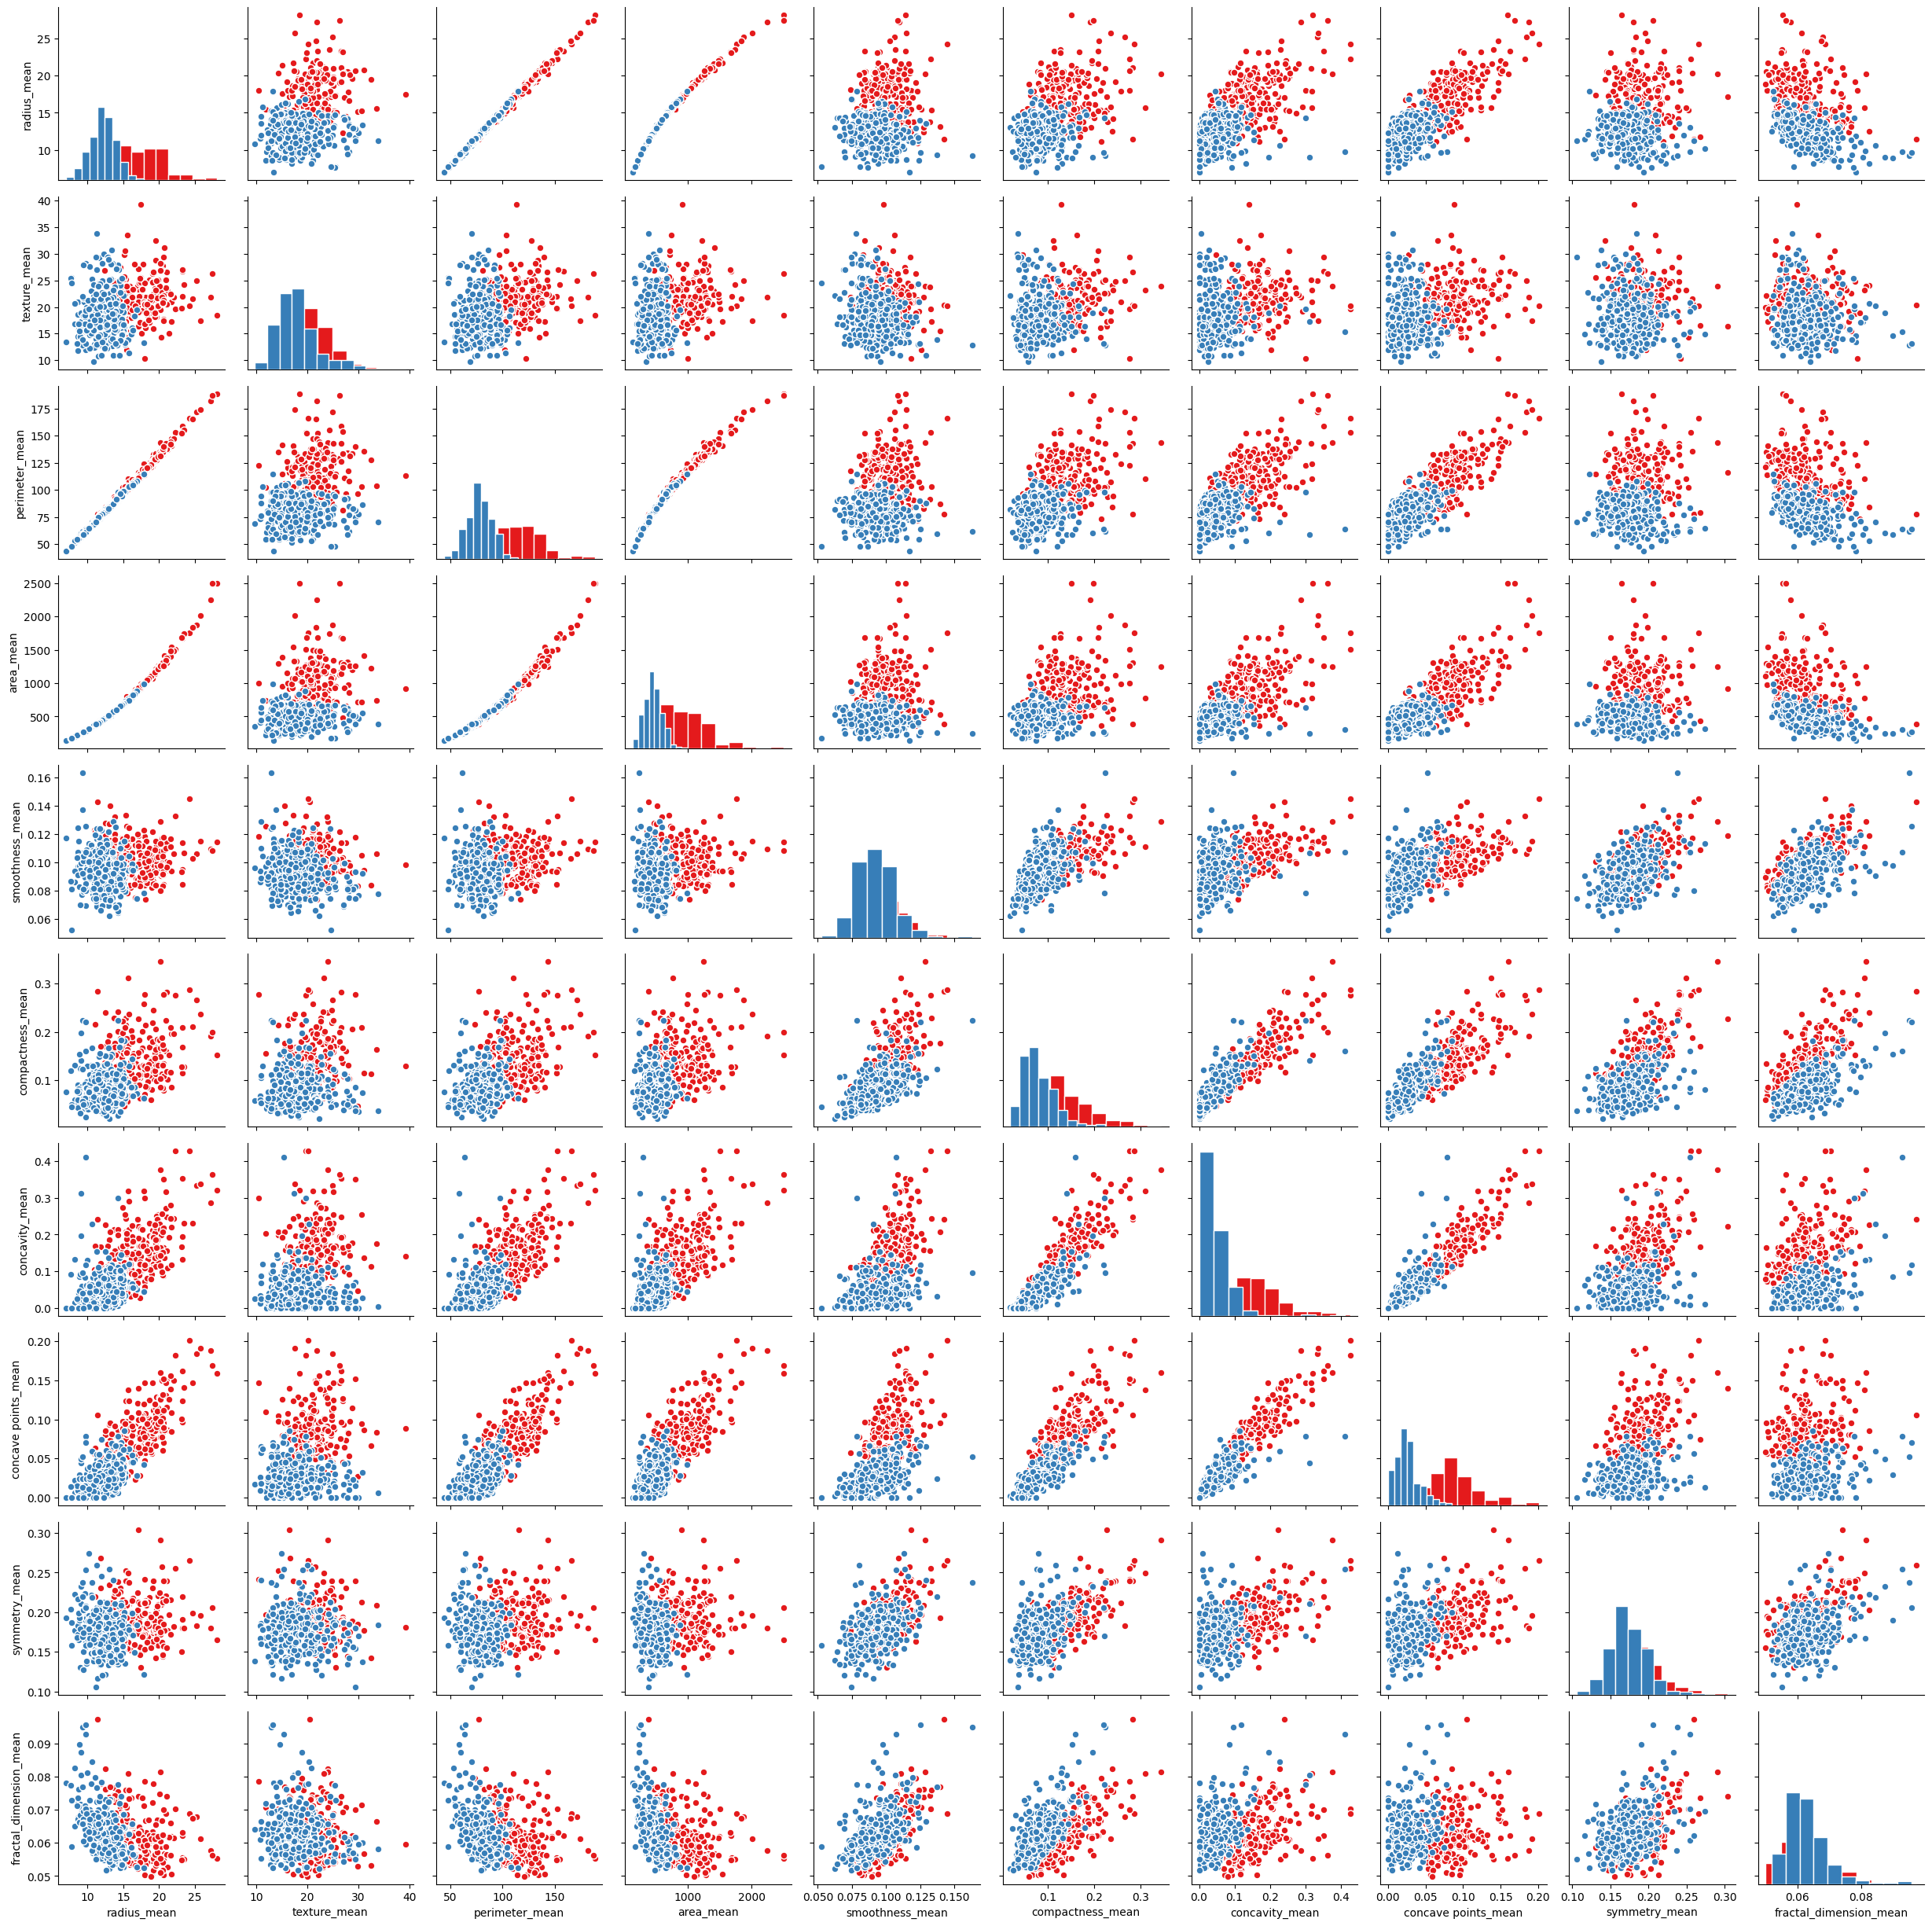

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df.iloc[:, 0:11], hue="diagnosis", palette="Set1")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

It seems that:
1. There are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.
2. The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:
    * radius
    * perimeter
    * area
    * compactness
    * concavity
    * concave points

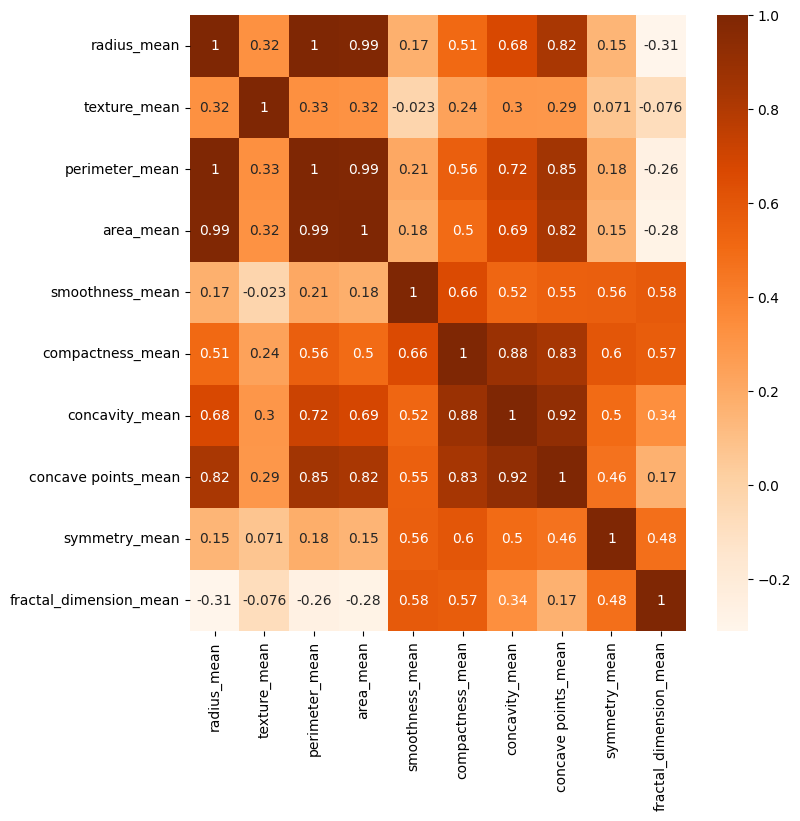

In [12]:
df_corr = df.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Oranges", annot=True)
plt.show()

* As it was expected there are very strong correlations between radius, perimeter and area.
* Compactness, concavity and and concave points are also highly correlated.

These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

### Encode "diagnosis" to numerical values

In [13]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

## Machine Learning
### Split Data to Train/Test Sets
Create train/test sets using the `train_test_split` function. The `test_size=0.3` inside the function indicates the percentage of the data that should be held over for testing.

In [14]:
from sklearn.model_selection import train_test_split

array = df.values

# Define the independent variables as features.
features = array[:,1:]

# Define the target (dependent) variable as labels.
labels = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Check the split printing the shape of each set.
print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(398, 30) (398,)
(171, 30) (171,)


# K Nearest Neighbors (K-NN) Classifir


K-NN was chosen amongst other algorithms (e.g. Support Vector Machines, Decision Trees and Naive Bayes), because it is quite fast and produces acceptable results. The speed of K-NN can be explained by the fact that this algorithm is a lazy learner and does not do much during training process unlike other classifiers that build the models. The performance of K-NN will be examined tuning the algorithm and applying various preprocessing steps.
#### Evaluation of the algorithm
Accuracy, i.e. the fraction of correct predictions is typically not enough information to evaluate a model. Although it is a starting point, it can lead to invalid decisions. Models with high accuracy may have inadequate precision or recall scores. For this reason the evaluation metrics that were also assessed are:
* Precision or the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. In our study case, precision is when the algorithm guesses that a cell is malignant and actually measures how certain we are that this cell is a true malignant. For example, a precision of 0.9 means that if the model predicts 100 malignant cells, the 90 of them are malignant and the rest 10 are benign (false).
* Recall or the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. In context to the study, recall shows how well our identifier can find the malignant cells. For example, a low recall score of 0.8 indicates that our identifier finds only 80% of all the real malignant cells in the prediction. The rest 20% of real malignant cells will not be found by the diagnosis based on this algorithm, something that is unacceptable.
* F1 score, a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 x (precision x recall) / (precision + recall).

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    clf = KNeighborsClassifier()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print("Prediction time:", round(time()-t1, 3), "s")
    print(" Precision:",precision_score(labels_test, predictions))
    print(" Recall:",recall_score(labels_test, predictions))
    print(" F1_score:",f1_score(labels_test, predictions))

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)


    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_ml_results()

Training time: 0.001 s
Prediction time: 0.056 s
 Precision: 0.9827586206896551
 Recall: 0.9047619047619048
 F1_score: 0.9421487603305785

Report:

Accuracy: 0.9590643274853801

               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       108
         1.0       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[107   1]
 [  6  57]]


* The algorithm will be tuned to achieve an improved performance, especially a better recall score for the malignant class, since 90% can be considered a low recall score in this case.

#### Remove Highly Correlated Features and Run Again
Investigate if removing manually features with a correlation higher than 0.8, can benefit the algorithm performance, although later this will be handled automatically by dimensionality reduction.

In [16]:
df_new = df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)

print_ml_results()

Training time: 0.001 s
Prediction time: 0.019 s
 Precision: 0.9423076923076923
 Recall: 0.7777777777777778
 F1_score: 0.8521739130434781

Report:

Accuracy: 0.9005847953216374

               precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       108
         1.0       0.94      0.78      0.85        63

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

[[105   3]
 [ 14  49]]


There is a significant decrease in algorithm's accuracy and recall mostly for the malignant class. It's difficult to select manually the best features especially for datasets with many features correlated. Sometimes, ambiguity can occur when three or more variables are correlated. For example, if feature 1 is correlated with feature 2, while feature 2 is correlated with feature 3 but not feature 1, which one is better to remove? To resolve this automatically, dimensionality reduction methods are used such as Principal Component Analysis.

### Cross Validation
Train/test split has a lurking danger if the split isn't random and when one subset of our data has only observations from one class, i.e. our data are imbalanced. This will result in overfitting. To avoid this, cross validation is applied. There are several cross validation methods such as K-Fold and Stratified K-Fold.

In K-Fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is the increased accuracy because all observations are used for both training and validation, and each observation is used for validation exactly once.

If the original data comes in some sort of sorted shape, a shuffle of the order of the data points is necessary before splitting them up into folds. This can be done in `KFold()`, setting the `shuffle` parameter to `True`. If there are concerns about class imbalance, then the `StratifiedKFold()` class should be used instead. Where `KFold()` assigns points to folds without attention to output class, `StratifiedKFold()` assigns data points to folds so that each fold has approximately the same number of data points of each output class. This is most useful for when we have imbalanced numbers of data points in the outcome classes (e.g. one is rare compared to the others). For this class as well, it can be used `shuffle=True` to shuffle the data points' order before splitting into folds.

### Scale Features
A common good practice in machine learning is feature scaling, normalization, standardization or binarization of the predictor variables. The main purposes of these methods are two:
1. Create comparable features in terms of units, e.g. if there are values in different units, then, the scaled data will be the same.
2. Create comparable features in terms of size, e.g. if two variables have vastly different ranges, the one with the larger range may dominate the predictive model, even though it may be less important to the target variable than the variable with the smaller range.

Feature scaling was applied here, since it is useful for algorithms that weigh inputs like regression and neural networks, as well as algorithms that use distance measures like K-NN.

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)

Unscaled data
 [[13.74 17.91  0.08 ...  0.16  0.23  0.07]
 [13.37 16.39  0.07 ...  0.33  0.2   0.08]
 [14.69 13.98  0.1  ...  0.32  0.28  0.09]
 ...
 [14.29 16.82  0.06 ...  0.04  0.25  0.06]
 [13.98 19.62  0.11 ...  0.41  0.32  0.11]
 [12.18 20.52  0.08 ...  0.11  0.27  0.07]]

Scaled data
 [[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]]


### Principal Component Analysis (PCA)
PCA is a preprocessing step, which decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is used when we need to tackle datasets with a large number of features with different scales, some of which might be correlated. These correlations and the high dimension of the dataset bring a redudancy in the information. Applying PCA, the original features are transformed to linear combinations of new independent variables, which reduce the complexity of the dataset and thus, the computational cost.

Summarizing, the main purpose of principal component analysis is to:
* identify hidden pattern in a data set,
* reduce the dimensionnality of the data by removing the noise and redundancy in the data,
* identify correlated variables

<ipython-input-18-4622acb0c278>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


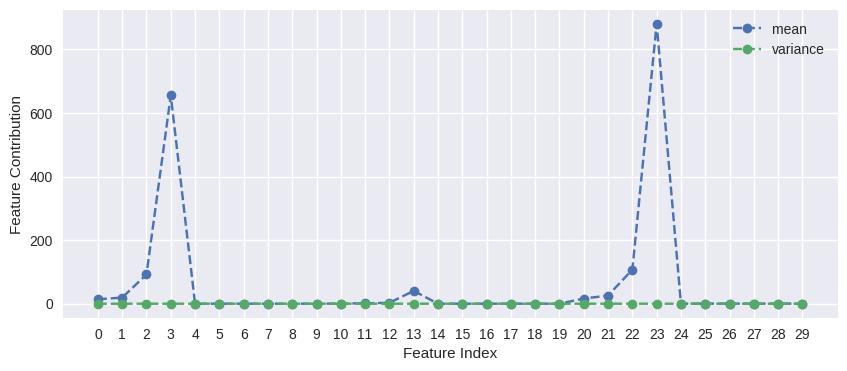

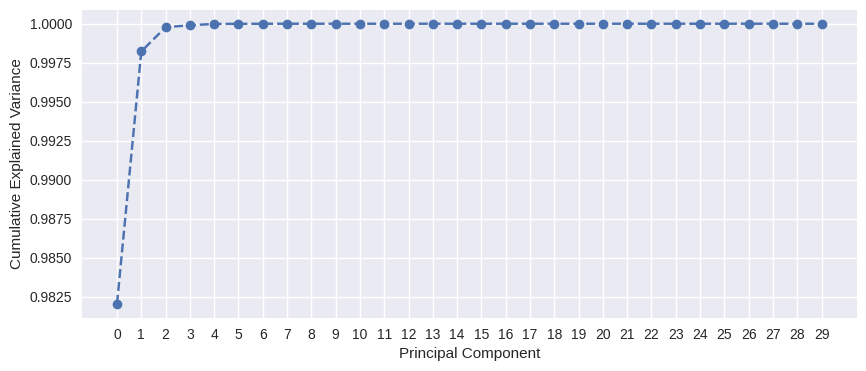

In [18]:
from sklearn.decomposition import PCA

pca = PCA(30)
projected = pca.fit_transform(features)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

Applying PCA on the unscaled dataset, it seems that more than 99% of the variance is explained by only one component, which is too good to be true. The feature contribution plot depicts that principal components 3 (`area_mean`) and 23 (`area_worst`) dominate the PCA. This is explained by the large variance of `area_mean` and `area_worst` (see std values of the Data Exploration section). To avoid this, feature scaling prior to PCA is highly recommended.

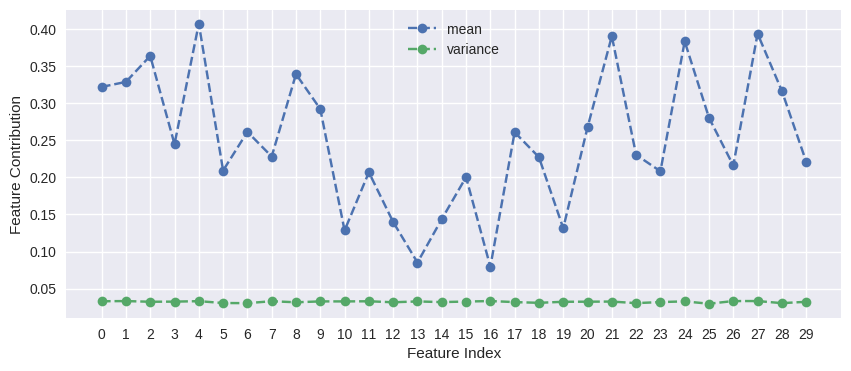

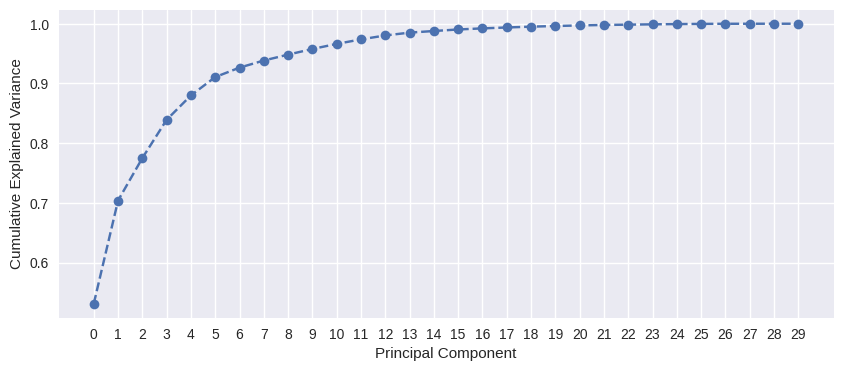

In [19]:
projected_scaled = pca.fit_transform(features_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plot_pca()

After applying scaling before PCA, 5 principal components are required to explain more than 90% of the variance. This shows a better handle on the variation within the dataset.

### Univariate Feature Selection
This preprocessing step is used to select the best features based on univariate statistical tests. Most common methods are:
* `SelectKBest()`, which removes all but the k highest scoring features, and
* `SelectPercentile()`, which removes all but a user-specified highest scoring percentage of features.

**Note:** First the dataset must be splitted into train and test sets, since performing feature selection on the whole dataset would lead to prediction bias.

In [20]:
from sklearn.feature_selection import SelectKBest

select = SelectKBest()
select.fit(features_train, labels_train)
scores = select.scores_
# Show the scores in a table
feature_scores = zip(df.columns.values.tolist(), scores)
ordered_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in ordered_feature_scores:
    print(feature, score)

diagnosis 409.3245864912662
perimeter_se 330.7050300683694
perimeter_mean 203.2758586734192
compactness_mean 167.44253743713728
area_se 91.79322921512899
radius_mean 78.2141419937648
fractal_dimension_mean 73.09643056193244
texture_mean 57.90404620766715
area_mean 55.68156294663304
smoothness_se 36.50314001308614
symmetry_mean 31.544286977341688
texture_se 1.436108387652595
concave points_mean 0.963553272103642
radius_se 0.44179991691549336
smoothness_mean 0.40799708167262283
concavity_mean 0.18130626842704356


### Tune the algorithm
#### Putting it all together with GridSearchCV and Pipeline
Algorithm tuning is a process in which we optimize the parameters that impact the model in order to enable the algorithm to perform with an improved performance. If we don't tune the algorithms well, performance will be poor with low accuracy, precision or recall. Most of the machine learning algorithms contain a set of parameters (hyperparameters), which should be set up adequately to perform the best. While all of the algorithms attempt to set reasonable default hyperparameters, they can often fail to provide optimal results for many real world datasets in practice. To find an optimized combination of hyperparameters, a metric is chosen to measure the algorithm's performance on an independent data set and hyperparameters that maximize this measure are adopted.

Tuning the models is a tedious, time-consuming process and there can sometimes be interactions between the choices we make in one step and the optimal value for a downstream step. Hopefully, there are two simple and easy tuning strategies, grid search and random search. Scikit-learn provides these two methods for algorithm parameter tuning. `GridSearchCV()` allows us to construct a grid of all the combinations of parameters passing one classifier to pipeline each time, tries each combination, and then reports back the best combination. So, instead of trying numerous values for each tuning parameter, `GridSearchCV()` will apply all the combinations of parameters - not just vary them independently - avoiding local optima.

The power of `GridSearchCV()` is that it multiplies out all the combinations of parameters and tries each one, making a k-fold cross-validated model for each combination. Then, we can ask for predictions and parameters from our `GridSearchCV()` object and it will automatically return to us the best set of predictions, as well as the best parameters.

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(" Accuracy:",accuracy_score(labels_test, predictions))
    print(" Precision:",precision_score(labels_test, predictions))
    print(" Recall:",recall_score(labels_test, predictions))
    #print(" F1_score:",f1_score(labels_test, predictions))
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")

    return grid.best_estimator_

get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       108
         1.0       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.943663253206249
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'reduce_dim': PCA(iterated_power=7, n_components=5), 'reduce_dim__n_components': 5}
 Accuracy: 0.9707602339181286
 Precision: 0.967741935483871
 Recall: 0.9523809523809523
[[106   2]
 [  3  60]]
Time passed:  26.847 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=5)),
                ('clf', KNeighborsClassifier(n_neighbors=6))])

#### KNN for all features without PCA in GridSearch.

In [22]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]


get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       108
         1.0       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Best f1-score:
0.9402293879975969
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 4}
 Accuracy: 0.9766081871345029
 Precision: 0.9836065573770492
 Recall: 0.9523809523809523
[[107   1]
 [  3  60]]
Time passed:  3.118 s


Pipeline(steps=[('clf', KNeighborsClassifier(n_neighbors=4))])

#### KNN for manually selectrd features using grid Search

In [23]:
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)

get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       108
         1.0       0.94      0.76      0.84        63

    accuracy                           0.89       171
   macro avg       0.91      0.87      0.88       171
weighted avg       0.90      0.89      0.89       171

Best f1-score:
0.8354588499150599
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6}
 Accuracy: 0.8947368421052632
 Precision: 0.9411764705882353
 Recall: 0.7619047619047619
[[105   3]
 [ 15  48]]
Time passed:  3.828 s


Pipeline(steps=[('clf', KNeighborsClassifier(n_neighbors=6))])

#### Combine PCA and Feature Selection with FeatureUnion
Often it is beneficial to combine several methods to obtain good performance. `FeatureUnion()` will be used to combine features obtained by PCA and univariate selection, `SelectKBest()`. Combining features using this transformer has the advantage that it allows cross validation and grid searches over the whole process. Datasets that benefit from this can often:
* consist of heterogeneous data types (e.g. raster images and text captions),
* are stored in a Pandas DataFrame and different columns require different processing pipelines.

In [24]:
# Build the estimator from PCA and univariate selection.
combined_features = FeatureUnion([('pca', PCA()), ('univ_select', SelectKBest())])
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Do grid search over k, n_components and K-NN parameters.
pipeline = Pipeline([('features', combined_features),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'features__pca': [PCA(iterated_power=7)],
        'features__pca__n_components': n_features_options,
        'features__univ_select__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

get_best_estimator(20)


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.9490374678040225
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'features__pca': PCA(iterated_power=7, n_components=5), 'features__pca__n_components': 5, 'features__univ_select__k': 3}
 Accuracy: 0.9707602339181286
 Precision: 0.9833333333333333
 Recall: 0.9365079365079365
[[107   1]
 [  4  59]]
Time passed:  65.707 s


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca',
                                                 PCA(iterated_power=7,
                                                     n_components=5)),
                                                ('univ_select',
                                                 SelectKBest(k=3))])),
                ('clf', KNeighborsClassifier(n_neighbors=6))])

### Conclusions

In this study, K-NN algorithm was applied for the diagnosis of the Breast Cancer Wisconsin DataSet. It was found that precision and recall scores can be considerably improved applying the following steps:
* Feature Scaling
* Dimensionality Reduction
* Cross Validation
* Hyperparameter Optimization

For better results more data are required and other algorithms should be used.

### References
1. http://scikit-learn.org/stable/index.html
2. https://jakevdp.github.io/PythonDataScienceHandbook/
3. http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
3. https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6

# Desicion Tree

- For all features Without GridSearch

In [25]:
from sklearn import tree
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)
# Create classifier.
clf_dt = tree.DecisionTreeClassifier()

def print_results(clf,features_train, features_test):
    t0 = time()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print(" Precision:",precision_score(labels_test, predictions))
    print(" Recall:",recall_score(labels_test, predictions))
    print(" F1_score:",f1_score(labels_test, predictions))
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_results(clf_dt,features_train, features_test)

Training time: 0.007 s
 Precision: 0.8787878787878788
 Recall: 0.9206349206349206
 F1_score: 0.8992248062015504
Prediction time: 0.008 s

Report:

Accuracy: 0.9239766081871345

               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       108
         1.0       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171

[[100   8]
 [  5  58]]


- ####  For manually selected feature columns without GridSearch.


In [26]:
df_new = df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)

print_results(clf_dt,features_train, features_test)

Training time: 0.006 s
 Precision: 0.8923076923076924
 Recall: 0.9206349206349206
 F1_score: 0.90625
Prediction time: 0.007 s

Report:

Accuracy: 0.9298245614035088

               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       108
         1.0       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

[[101   7]
 [  5  58]]


## Decision tree with PCA for all features using GridSearch.

In [27]:
from sklearn.preprocessing import StandardScaler

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features)

# create train/test split for 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)

pca = PCA()
std_slc = StandardScaler()

n_components = list(range(1,features_train.shape[1]+1,1))

# Create classifier.
clf = tree.DecisionTreeClassifier()

# Create the pipeline.
pipeline = Pipeline([('std_slc', std_slc),
                     ('pca', pca),
                     ('clf', clf_dt)])

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = [{'pca__n_components' : n_components,
                      'clf__criterion':criterion,
                      'clf__max_depth':max_depth}]


get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       108
         1.0       0.88      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171

Best f1-score:
0.9031485336692597
Best parameters:
{'clf__criterion': 'entropy', 'clf__max_depth': 10, 'pca__n_components': 5}
 Accuracy: 0.9415204678362573
 Precision: 0.8840579710144928
 Recall: 0.9682539682539683
[[100   8]
 [  2  61]]
Time passed:  62.157 s


Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

# Random Forest

- Random Forest classifier for all features without GridSearch and without PCA

In [28]:
from sklearn.ensemble import RandomForestClassifier
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create classifier.
clf_rf = RandomForestClassifier()

print_results(clf_rf,features_train, features_test)

Training time: 0.229 s
 Precision: 0.9672131147540983
 Recall: 0.9365079365079365
 F1_score: 0.9516129032258064
Prediction time: 0.015 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       108
         1.0       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  4  59]]


## Random Forest classifier with manually selected features without Gridsearch.

In [29]:
# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)

print_results(clf_rf,features_train, features_test)

Training time: 0.215 s
 Precision: 0.967741935483871
 Recall: 0.9523809523809523
 F1_score: 0.96
Prediction time: 0.029 s

Report:

Accuracy: 0.9707602339181286

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       108
         1.0       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[106   2]
 [  3  60]]


#### Look at parameters used by our current forest

In [30]:
from pprint import pprint


print('Parameters currently in use:\n')
pprint(clf_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Random search for Random Forest classifier using PCA pipeline for all features.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf_rf)])
# Create the parameters.
n_features_options = [1, 3, 5, 7]
random_grid = {'reduce_dim': [PCA(iterated_power=7)],
               'reduce_dim__n_components': n_features_options,
                'clf__n_estimators': n_estimators,
               'clf__max_features': max_features,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf,
               'clf__bootstrap': bootstrap}

pprint(random_grid)

{'clf__bootstrap': [True, False],
 'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'clf__max_features': ['auto', 'sqrt'],
 'clf__min_samples_leaf': [1, 2, 4],
 'clf__min_samples_split': [2, 5, 10],
 'clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'reduce_dim': [PCA(iterated_power=7)],
 'reduce_dim__n_components': [1, 3, 5, 7]}


In [33]:
# create train/test split for 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = pipeline, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('reduce_dim', PCA()),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'clf__bootstrap': [True, False],
                                        'clf__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'clf__max_features': ['auto', 'sqrt'],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [200, 400, 600,
                                                              800, 1000, 1200,
                                                              1400, 1600, 1800,
                                                              2000],
                                        'reduce_dim': [PCA(iterated_power=7,
                                                           n_components=7)],
                                        'reduce_dim__n_components': [1, 3, 5,
                                                                     7]},
                   random_state=42, verbose=2)

In [34]:
# For all feature columns
clf_random = clf_random.best_estimator_     # creating the best classifier w.r.t random hyperparameter search
print_results(clf_random,features_train, features_test)

Training time: 8.504 s
 Precision: 0.9523809523809523
 Recall: 0.9523809523809523
 F1_score: 0.9523809523809523
Prediction time: 0.189 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       108
         1.0       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   3]
 [  3  60]]


## Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

RandomSearch for all features for Random Forest Classifier without PCA.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
# create train/test split for 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
clf_random.best_params_   # Random search best hyper params

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

#### selecting best parameter and assigning to `clf_random`.

In [38]:
# For all feature columns
clf_random = clf_random.best_estimator_     # creating the best classifier w.r.t random hyperparameter search
print_results(clf_random,features_train, features_test)

Training time: 2.735 s
 Precision: 0.9672131147540983
 Recall: 0.9365079365079365
 F1_score: 0.9516129032258064
Prediction time: 0.179 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       108
         1.0       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  4  59]]


## Random search for Random forest classifier without using PCA for manually selected features.

In [39]:
# Few feature columns
# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)
print_results(clf_random,features_train, features_test)

Training time: 3.464 s
 Precision: 0.9365079365079365
 Recall: 0.9365079365079365
 F1_score: 0.9365079365079365
Prediction time: 0.262 s

Report:

Accuracy: 0.9532163742690059

               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       108
         1.0       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[104   4]
 [  4  59]]


# SVM

- #### Manually selected parameters

In [40]:
features_train_new, features_test_new, labels_train_new, labels_test_new = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)


# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', random_state = 0, probability=True)

# results
print_results(svm_clf,features_train_new, features_test_new)

Training time: 0.164 s
 Precision: 0.9230769230769231
 Recall: 0.9523809523809523
 F1_score: 0.9375
Prediction time: 0.02 s

Report:

Accuracy: 0.9532163742690059

               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       108
         1.0       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[103   5]
 [  3  60]]


#### All features with svm without PCA and without GridSearch.

In [41]:
def print_results1(clf,features_train, features_test):
    t0 = time()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print(" Precision:",precision_score(labels_test, predictions))
    print(" Recall:",recall_score(labels_test, predictions))
    print(" F1_score:",f1_score(labels_test, predictions))
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    cnf_matrix = confusion_matrix(labels_test, predictions)
    print(cnf_matrix)

    %matplotlib inline
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('confusion matrix: ', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    y_pred_proba = clf.predict_proba(features_test)[::,1]
    fpr, tpr, _ = roc_curve(labels_test,  y_pred_proba)
    auc = roc_auc_score(labels_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.title('ROC curve: ', y=1.1)
    plt.legend(loc=4)
    plt.show()

Training time: 0.014 s
 Precision: 1.0
 Recall: 0.9682539682539683
 F1_score: 0.9838709677419354
Prediction time: 0.008 s

Report:

Accuracy: 0.9883040935672515

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       108
         1.0       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

[[108   0]
 [  2  61]]


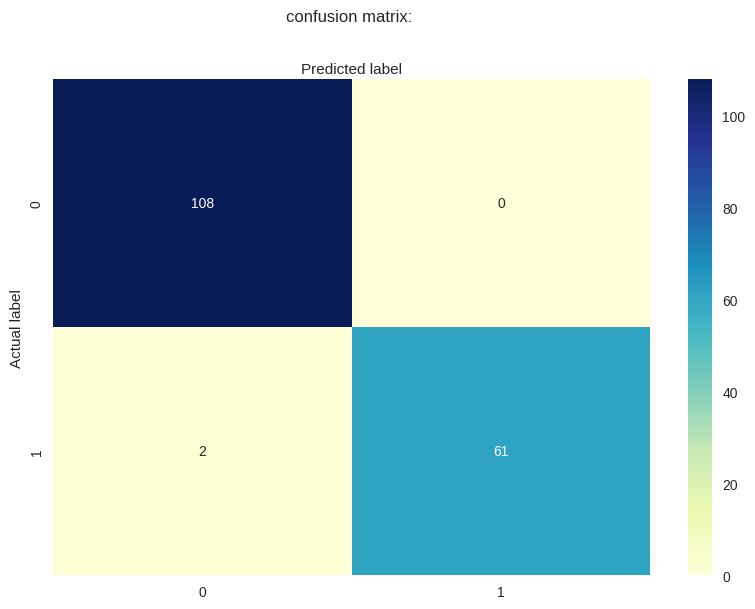

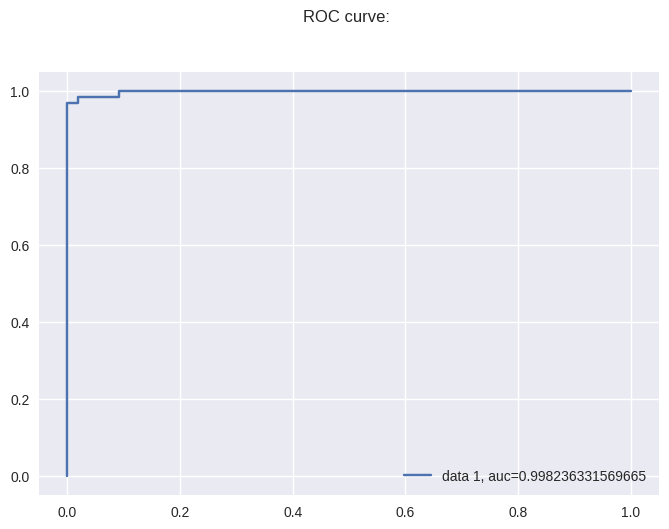

In [42]:

features_train, features_test, labels_train, labels_test = train_test_split(features, labels,
                                                                            test_size=0.3, random_state=42)

print_results1(svm_clf,features_train, features_test)

## Svm with GridSearch for all features without PCA

# Tuning hyper-parameters for precision



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.312 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.312 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.921 (+/-0.024) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.312 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.964 (+/-0.028) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.921 (+/-0.024) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.977 (+/-0.024) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.964 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.025) for {'C': 1, 'kernel': 'linear'}
0.970 (+/-0.033) for {'C': 10, 'kernel': 'linear'}
0.960 (+/-0.024) for {'C': 100, 'kernel': 'linear'}
0.952 (+/-0.031) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

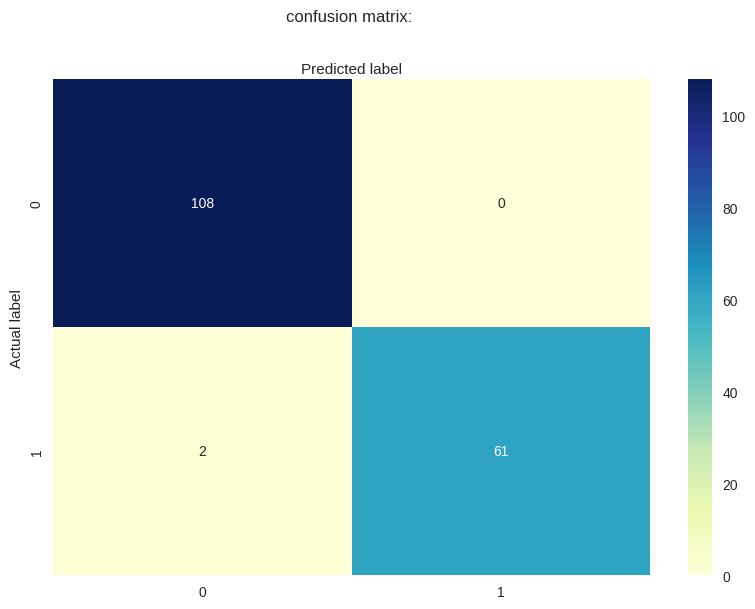

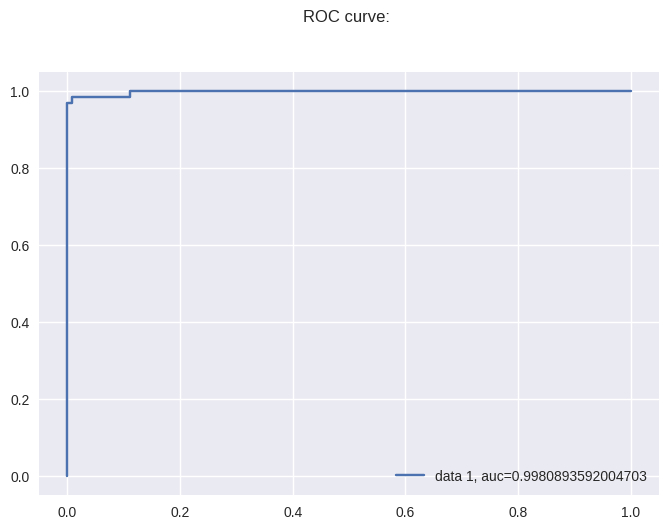

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.845 (+/-0.052) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.940 (+/-0.045) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.845 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.966 (+/-0.031) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.940 (+/-0.045) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.961 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.962 (+/-0.044) for {'C': 10, 'kernel': 'linear'}
0.952 (+/-0.032) for {'C': 100, 'kernel': 'linear'}
0.951 (+/-0.032) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on

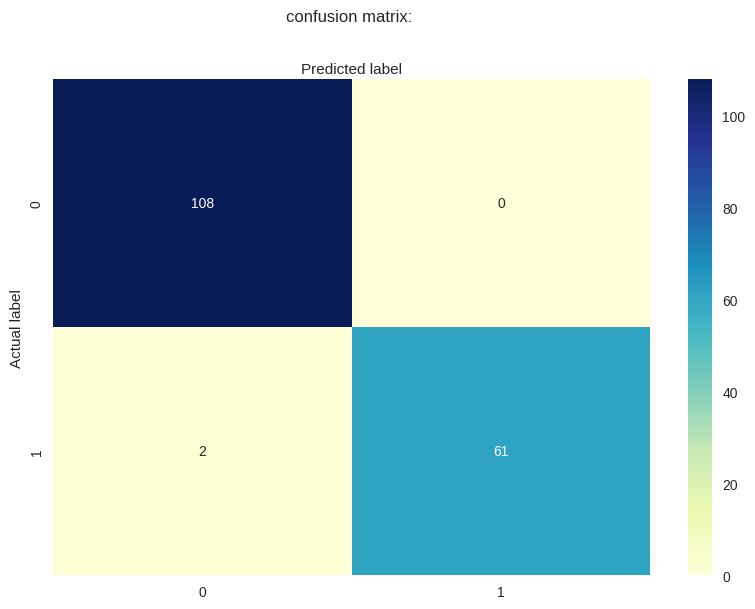

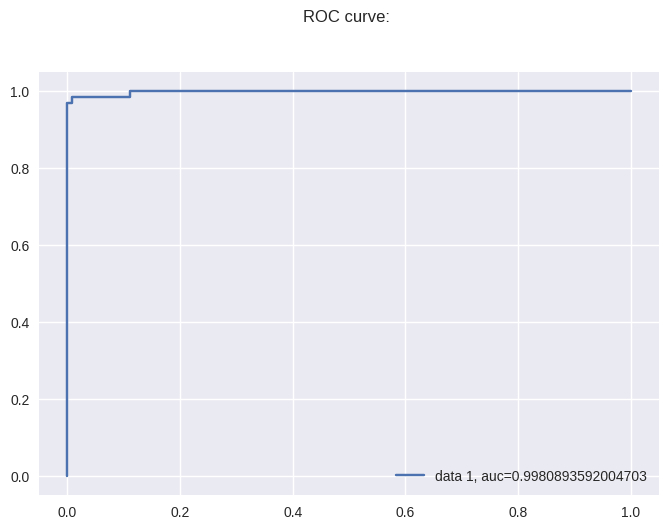

In [43]:

features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
def grid_svm(features_train, features_test,labels_train, labels_test):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        sss = StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=3)

        clf = GridSearchCV(
            SVC(probability=True), tuned_parameters, scoring='%s_macro' % score, cv=sss
        )
        clf.fit(features_train,labels_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = labels_test, clf.predict(features_test)
        print(classification_report(y_true, y_pred))
        print('accuracy:', clf.score(features_test, labels_test))
        print('precision:', precision_score(y_true, y_pred))

        print('Recall:', recall_score(y_true, y_pred))
        print('F1_score:', f1_score(y_true, y_pred))
        cnf_matrix = confusion_matrix(y_true, y_pred)
        print(cnf_matrix)
        print()

        %matplotlib inline
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('confusion matrix: ', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')


        y_pred_proba = clf.predict_proba(features_test)[::,1]
        fpr, tpr, _ = roc_curve(labels_test,  y_pred_proba)
        auc = roc_auc_score(labels_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.title('ROC curve: ', y=1.1)
        plt.legend(loc=4)
        plt.show()

grid_svm(features_train, features_test,labels_train, labels_test)

## Svm Grid Search for manually selected features.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.889 (+/-0.066) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.833 (+/-0.008) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.059) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.885 (+/-0.073) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.925 (+/-0.041) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.896 (+/-0.066) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.940 (+/-0.043) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.930 (+/-0.045) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.938 (+/-0.060) for {'C': 1, 'kernel': 'linear'}
0.955 (+/-0.044) for {'C': 10, 'kernel': 'linear'}
0.964 (+/-0.025) for {'C': 100, 'kernel': 'linear'}
0.966 (+/-0.036) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full 

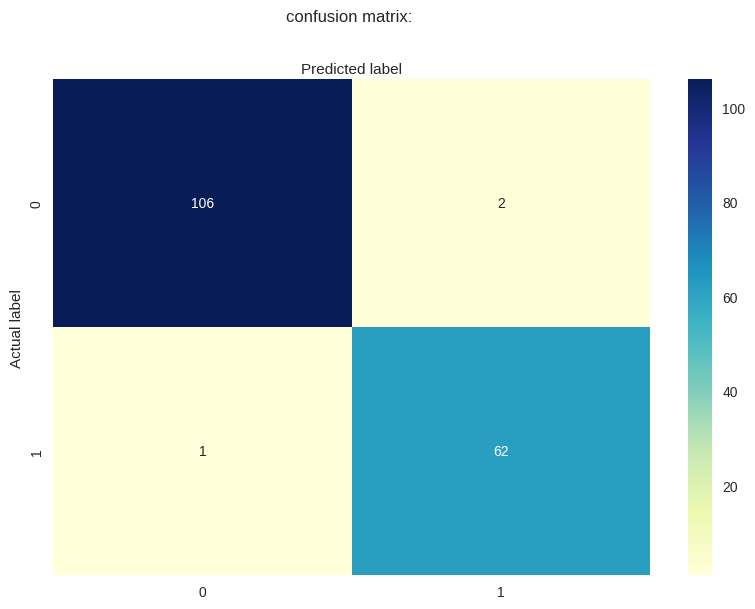

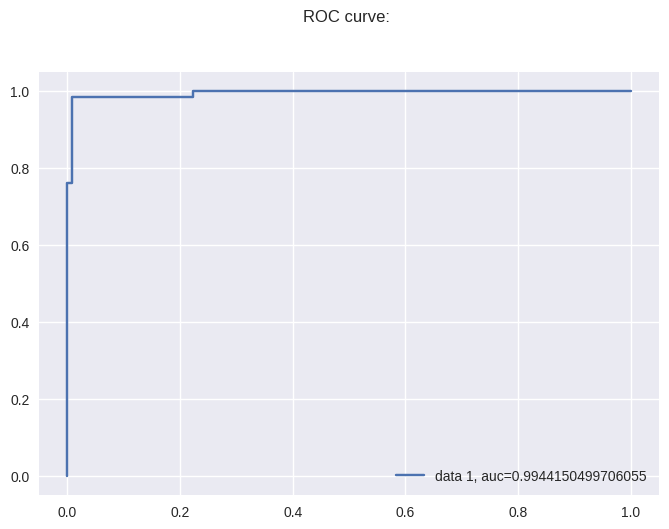

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.846 (+/-0.056) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.581 (+/-0.031) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.886 (+/-0.048) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.840 (+/-0.059) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.042) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.869 (+/-0.054) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.928 (+/-0.047) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.041) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.926 (+/-0.061) for {'C': 1, 'kernel': 'linear'}
0.944 (+/-0.052) for {'C': 10, 'kernel': 'linear'}
0.955 (+/-0.036) for {'C': 100, 'kernel': 'linear'}
0.955 (+/-0.050) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full eval

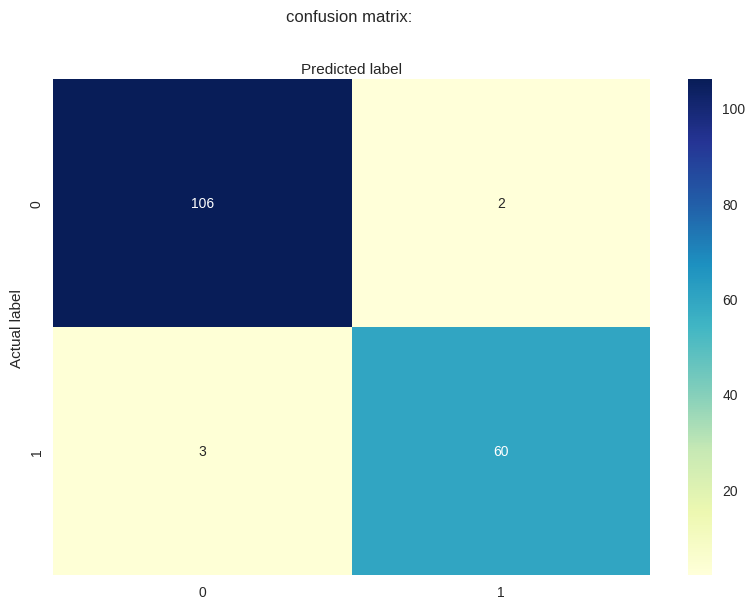

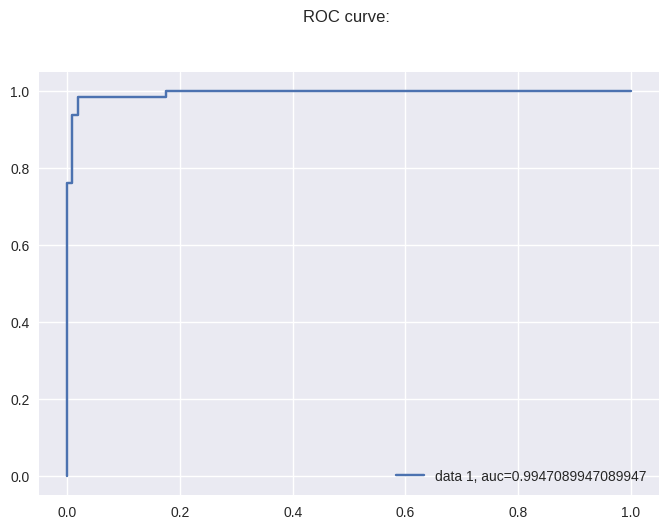

In [44]:
grid_svm(features_train_new, features_test_new,labels_train, labels_test)

## SVM PCA


In [45]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)



In [46]:
features_train.shape, features_test.shape

((398, 30), (171, 30))

### SVM PCA GRID Stratified_cv

#### using get_best_estimator(n_splits=20)

In [47]:
sv_clf = SVC(probability=True)
# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA(iterated_power=7)),
                     ('clf', sv_clf)])
n_features_options = [1, 3, 5, 7]
kernel = ['rbf', 'linear', 'poly']
C_param =  [1, 10, 100, 1000]
gamma =  [1e-3, 1e-4]

# Set the parameters by cross-validation


parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__kernel':  kernel,
        'clf__C' : C_param,
        'clf__gamma': gamma
    }]

get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       108
         1.0       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

Best f1-score:
0.9550189924464192
Best parameters:
{'clf__C': 1, 'clf__gamma': 0.001, 'clf__kernel': 'linear', 'reduce_dim': PCA(iterated_power=7, n_components=5), 'reduce_dim__n_components': 5}
 Accuracy: 0.9883040935672515
 Precision: 1.0
 Recall: 0.9682539682539683
[[108   0]
 [  2  61]]
Time passed:  31.696 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=5)),
                ('clf',
                 SVC(C=1, gamma=0.001, kernel='linear', probability=True))])

# XGBoost Gridsearch.

In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)

WIth pcA Grid Search, XGBoost

In [49]:

xgbc_grid = XGBClassifier()
pipeline = Pipeline([('reduce_dim', PCA(iterated_power=7)),
                     ('clf', xgbc_grid)])
n_features_options = [1, 3, 5, 7]
gamma =  [0, 0.2]
learning_rate =  [0.1, 0.3]
colsample_bylevel = [1]
max_delta_step = [0]
min_child_weight = [0.5, 2]
colsample_bytree =  [1]
# Set the parameters by cross-validation
parameters =  [
    {
    'reduce_dim': [PCA(iterated_power=7)],
    'reduce_dim__n_components': n_features_options,
    'clf__gamma' : gamma,
    'clf__learning_rate' : learning_rate,
    'clf__colsample_bylevel' : colsample_bylevel,
    'clf__max_delta_step' : max_delta_step,
    'clf__colsample_bytree' : colsample_bytree,
    'clf__min_child_weight' : min_child_weight
    }]



get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       108
         1.0       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Best f1-score:
0.9379058995261211
Best parameters:
{'clf__colsample_bylevel': 1, 'clf__colsample_bytree': 1, 'clf__gamma': 0, 'clf__learning_rate': 0.3, 'clf__max_delta_step': 0, 'clf__min_child_weight': 2, 'reduce_dim': PCA(iterated_power=7, n_components=5), 'reduce_dim__n_components': 5}
 Accuracy: 0.9532163742690059
 Precision: 0.9365079365079365
 Recall: 0.9365079365079365
[[104   4]
 [  4  59]]
Time passed:  31.726 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=5)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=1, colsample_bynode=None,
                               colsample_bytree=1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=0,
                               max_depth=None, max_leaves=None,
                               min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### XGboost with Grid, All features without pca

In [50]:

features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)
xgbc_grid = XGBClassifier()
pipeline = Pipeline([
                     ('clf', xgbc_grid)])
gamma =  [0, 0.2]
learning_rate =  [0.1, 0.3]
colsample_bylevel = [1]
max_delta_step = [0]
min_child_weight = [0.5, 2]
colsample_bytree =  [1]
# Set the parameters by cross-validation
parameters =  [
    {
    'clf__gamma' : gamma,
    'clf__learning_rate' : learning_rate,
    'clf__colsample_bylevel' : colsample_bylevel,
    'clf__max_delta_step' : max_delta_step,
    'clf__colsample_bytree' : colsample_bytree,
    'clf__min_child_weight' : min_child_weight
    }]



get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       108
         1.0       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Best f1-score:
0.9470358897915242
Best parameters:
{'clf__colsample_bylevel': 1, 'clf__colsample_bytree': 1, 'clf__gamma': 0, 'clf__learning_rate': 0.3, 'clf__max_delta_step': 0, 'clf__min_child_weight': 2}
 Accuracy: 0.9649122807017544
 Precision: 0.9523809523809523
 Recall: 0.9523809523809523
[[105   3]
 [  3  60]]
Time passed:  18.2 s


Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=1, colsample_bynode=None,
                               colsample_bytree=1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=0,
                               max_depth=None, max_leaves=None,
                               min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### Above xgboost in Gridsearch with manually selected features and without pca()

In [51]:
df_new = df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)
xgbc_grid = XGBClassifier()
pipeline = Pipeline([('clf', xgbc_grid)])
gamma =  [0, 0.2]
learning_rate =  [0.1, 0.3]
colsample_bylevel = [1]
max_delta_step = [0]
min_child_weight = [0.5, 2]
colsample_bytree =  [1]
# Set the parameters by cross-validation
parameters =  [
    {
    'clf__gamma' : gamma,
    'clf__learning_rate' : learning_rate,
    'clf__colsample_bylevel' : colsample_bylevel,
    'clf__max_delta_step' : max_delta_step,
    'clf__colsample_bytree' : colsample_bytree,
    'clf__min_child_weight' : min_child_weight
    }]



get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       108
         1.0       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Best f1-score:
0.9378918644400583
Best parameters:
{'clf__colsample_bylevel': 1, 'clf__colsample_bytree': 1, 'clf__gamma': 0, 'clf__learning_rate': 0.3, 'clf__max_delta_step': 0, 'clf__min_child_weight': 0.5}
 Accuracy: 0.9532163742690059
 Precision: 0.9365079365079365
 Recall: 0.9365079365079365
[[104   4]
 [  4  59]]
Time passed:  12.176 s


Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=1, colsample_bynode=None,
                               colsample_bytree=1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=0,
                               max_depth=None, max_leaves=None,
                               min_child_weight=0.5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# Extra Trees Hyperparameters
In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the Extra Trees ensemble and their effect on model performance.

## Explore Number of Trees

An important hyperparameter for Extra Trees algorithm is the number of decision trees used in the ensemble.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Bagging, Random Forest, and Extra Trees algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

#### Extra trees Grid search with pca for all featrues

In [52]:
## Extra trees:
from sklearn.ensemble import ExtraTreesClassifier
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)

extra_tree_clf = ExtraTreesClassifier(random_state=42)

n_jobs = [-1]
n_estimators = [10, 50, 100]

criterion = ['gini','entropy']
max_features = ['auto']

pipeline = Pipeline([('reduce_dim', PCA(iterated_power=7)),
                     ('clf', extra_tree_clf)])
n_features_options = [1, 3, 5, 7]


# Set the parameters by cross-validation
parameters =  [
    {
    'reduce_dim': [PCA(iterated_power=7)],
    'reduce_dim__n_components': n_features_options,
     'clf__n_estimators' : n_estimators,

     'clf__criterion' : criterion,

     'clf__max_features' : max_features,
     'clf__n_jobs' : n_jobs

    }]



get_best_estimator(n_splits=20)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


Report:

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       108
         1.0       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Best f1-score:
0.9527627221440375
Best parameters:
{'clf__criterion': 'gini', 'clf__max_features': 'auto', 'clf__n_estimators': 100, 'clf__n_jobs': -1, 'reduce_dim': PCA(iterated_power=7, n_components=7), 'reduce_dim__n_components': 7}
 Accuracy: 0.9590643274853801
 Precision: 0.9375
 Recall: 0.9523809523809523
[[104   4]
 [  3  60]]
Time passed:  64.535 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=7)),
                ('clf',
                 ExtraTreesClassifier(max_features='auto', n_jobs=-1,
                                      random_state=42))])

## Extra trees grid search with all features without pca


In [53]:
pipeline = Pipeline([('clf', extra_tree_clf)])
parameters =  [
    {
     'clf__n_estimators' : n_estimators,

     'clf__criterion' : criterion,

     'clf__max_features' : max_features,
     'clf__n_jobs' : n_jobs

    }]


get_best_estimator(n_splits=20)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.9422285525715065
Best parameters:
{'clf__criterion': 'entropy', 'clf__max_features': 'auto', 'clf__n_estimators': 50, 'clf__n_jobs': -1}
 Accuracy: 0.9707602339181286
 Precision: 0.9833333333333333
 Recall: 0.9365079365079365
[[107   1]
 [  4  59]]
Time passed:  15.931 s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('clf',
                 ExtraTreesClassifier(criterion='entropy', max_features='auto',
                                      n_estimators=50, n_jobs=-1,
                                      random_state=42))])

## Extra trees with manually selected features using grid search



In [54]:

features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)

pipeline = Pipeline([('clf', extra_tree_clf)])
parameters =  [
    {
     'clf__n_estimators' : n_estimators,

     'clf__criterion' : criterion,

     'clf__max_features' : max_features,
     'clf__n_jobs' : n_jobs

    }]


get_best_estimator(n_splits=20)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       108
         1.0       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Best f1-score:
0.9392609961334015
Best parameters:
{'clf__criterion': 'gini', 'clf__max_features': 'auto', 'clf__n_estimators': 100, 'clf__n_jobs': -1}
 Accuracy: 0.9590643274853801
 Precision: 0.9516129032258065
 Recall: 0.9365079365079365
[[105   3]
 [  4  59]]
Time passed:  16.651 s


Pipeline(steps=[('clf',
                 ExtraTreesClassifier(max_features='auto', n_jobs=-1,
                                      random_state=42))])

# Voting Classifiers:

Voting classifier top 3 classifiers with best performance
format(classifier, A=all features, M= manual features, G=grid, P=PCA)
- SVM - A- G -P **(SVC(C = 1000, gamma = 0.001, kernel = 'rbf', probability=True))**
- KNN - A- G  **( KNeighborsClassifier(algorithm = 'auto', n_neighbors = 4) )**
- Xgboost -A - G **(XGBClassifier(colsample_bylevel = 1, colsample_bytree =1, gamma = 0, learning_rate =  0.3, max_delta_step = 0, min_child_weight = 0.5))**










### Hard Voting for all features without PCA using Grid Search.

In [55]:
#import voting classifier
from sklearn.ensemble import VotingClassifier
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)


svm_best = SVC(C = 1000, gamma = 0.001, kernel = 'rbf', probability=True) # svm for all features in gridsearch params
knn_best = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 4) #knn for all features in gridsearch params
xg_best = XGBClassifier(colsample_bylevel = 1, colsample_bytree =1, gamma = 0, learning_rate =  0.3, max_delta_step = 0, min_child_weight = 0.5)
classifiers = [
    ('svm',svm_best),
    ('knn', knn_best),
    ('xg', xg_best)
]
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]

#('reduce_dim', PCA(iterated_power=7))
pipeline = Pipeline([
    ("voting", VotingClassifier(classifiers, voting="hard"))
])
parameters =dict(
    voting__weights=combinations_on_off(len(classifiers))
)

get_best_estimator(n_splits=20)




Report:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       108
         1.0       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

Best f1-score:
0.9633018359740975
Best parameters:
{'voting__weights': [1, 0, 0]}
 Accuracy: 0.9883040935672515
 Precision: 1.0
 Recall: 0.9682539682539683
[[108   0]
 [  2  61]]
Time passed:  18.773 s


Pipeline(steps=[('voting',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=1000, gamma=0.001,
                                                   probability=True)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=4)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=N...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.3,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=0,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=0.5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  weights=[1, 0, 0]))])

#### Hard voting classifier for manually selected features using Grid Search.

In [56]:
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new,
                                                                            test_size=0.3, random_state=42)

get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       108
         1.0       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Best f1-score:
0.9378918644400583
Best parameters:
{'voting__weights': [0, 0, 1]}
 Accuracy: 0.9532163742690059
 Precision: 0.9365079365079365
 Recall: 0.9365079365079365
[[104   4]
 [  4  59]]
Time passed:  16.371 s


Pipeline(steps=[('voting',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=1000, gamma=0.001,
                                                   probability=True)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=4)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=N...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.3,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=0,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=0.5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  weights=[0, 0, 1]))])

#### Hard voting classifiers of all features using pca with Grid search.

In [57]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)




n_features_options = [1, 3, 5, 7]


classifiers = [
    ('svm',svm_best),
    ('knn', knn_best),
    ('xg', xg_best)
]
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]

#('reduce_dim', PCA(iterated_power=7))
pipeline = Pipeline([
                     ('reduce_dim', PCA(iterated_power=7)),
    ("voting", VotingClassifier(classifiers, voting="hard"))

])
parameters =[{
    'voting__weights':combinations_on_off(len(classifiers)),
    'reduce_dim__n_components': n_features_options,
    'reduce_dim': [PCA(iterated_power=7)]

}]



get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       108
         1.0       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Best f1-score:
0.9548140002875863
Best parameters:
{'reduce_dim': PCA(iterated_power=7, n_components=7), 'reduce_dim__n_components': 7, 'voting__weights': [1, 0, 0]}
 Accuracy: 0.9824561403508771
 Precision: 0.9838709677419355
 Recall: 0.9682539682539683
[[107   1]
 [  2  61]]
Time passed:  48.35 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=7)),
                ('voting',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=1000, gamma=0.001,
                                                   probability=True)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=4)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1,
                                                             device=None,
                                                             early_stoppin...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.3,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=0,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=0.5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  weights=[1, 0, 0]))])

## soft voting: for all features ucing pca

In [58]:

features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)

In [59]:
features_train.shape

(398, 30)

In [60]:
#('reduce_dim', PCA(iterated_power=7))

n_features_options = [1, 3, 5, 7]

classifiers = [
    ('svm',svm_best),
    ('knn', knn_best),
    ('xg', xg_best)
]
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]

#('reduce_dim', PCA(iterated_power=7))
pipeline = Pipeline([
                     ('reduce_dim', PCA(iterated_power=7)),
    ("voting", VotingClassifier(classifiers, voting="soft"))  # see voting  = 'soft' in this line

])
parameters =[{
    'voting__weights':combinations_on_off(len(classifiers)),
    'reduce_dim__n_components': n_features_options,
    'reduce_dim': [PCA(iterated_power=7)]

}]



get_best_estimator(n_splits=20)



Report:

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       108
         1.0       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.9586777664885648
Best parameters:
{'reduce_dim': PCA(iterated_power=7, n_components=7), 'reduce_dim__n_components': 7, 'voting__weights': [1, 1, 0]}
 Accuracy: 0.9707602339181286
 Precision: 0.967741935483871
 Recall: 0.9523809523809523
[[106   2]
 [  3  60]]
Time passed:  40.753 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=7)),
                ('voting',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=1000, gamma=0.001,
                                                   probability=True)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=4)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1,
                                                             device=None,
                                                             early_stoppin...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.3,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=0,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=0.5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft', weights=[1, 1, 0]))])

### soft voting for all features without pca using Grid Search.


In [61]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                         random_state=42)
features_train.shape

(398, 30)

In [62]:

classifiers = [
    ('svm',svm_best),
    ('knn', knn_best),
    ('xg', xg_best)
]
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]

pipeline = Pipeline([
    ("voting", VotingClassifier(classifiers, voting="soft"))  # see voting  = 'soft' in this line

])
parameters =[{
    'voting__weights':combinations_on_off(len(classifiers))
}]



get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       108
         1.0       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Best f1-score:
0.9658173919020904
Best parameters:
{'voting__weights': [1, 1, 0]}
 Accuracy: 0.9766081871345029
 Precision: 0.9836065573770492
 Recall: 0.9523809523809523
[[107   1]
 [  3  60]]
Time passed:  16.043 s


Pipeline(steps=[('voting',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=1000, gamma=0.001,
                                                   probability=True)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=4)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=N...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.3,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=0,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=0.5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft', weights=[1, 1, 0]))])

#### soft voting for manually selected features Using Grid search.

In [63]:
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new, test_size=0.3, random_state=42)
classifiers = [
    ('svm',svm_best),
    ('knn', knn_best),
    ('xg', xg_best)
]
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]

pipeline = Pipeline([
    ("voting", VotingClassifier(classifiers, voting="soft"))  # see voting  = 'soft' in this line

])
parameters =[{
    'voting__weights':combinations_on_off(len(classifiers))
}]


get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       108
         1.0       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Best f1-score:
0.9485976296315013
Best parameters:
{'voting__weights': [1, 0, 1]}
 Accuracy: 0.9649122807017544
 Precision: 0.9384615384615385
 Recall: 0.9682539682539683
[[104   4]
 [  2  61]]
Time passed:  14.978 s


Pipeline(steps=[('voting',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=1000, gamma=0.001,
                                                   probability=True)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=4)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=N...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.3,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=0,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=0.5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft', weights=[1, 0, 1]))])